In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import seaborn as sns 
%matplotlib inline 
import statsmodels.api as sm

from matplotlib import rc
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.style.use(['ggplot'])


from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday
import platform
from datetime import datetime, timezone, timedelta
import pytz
from tqdm.notebook import tqdm as tqdm

import warnings
warnings.filterwarnings(action='ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.options.display.float_format = '{:.4f}'.format
pd.options.display.max_rows=1000
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
        
# seed 설정
np.random.seed(42)

import math

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [2]:
test = pd.read_csv('Toy_data.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8184 entries, 0 to 8183
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            8184 non-null   object 
 1   VIX Index       8183 non-null   float64
 2   MOVE Index      8184 non-null   float64
 3   MXWD Index      8184 non-null   float64
 4   SBWGU Index     8184 non-null   float64
 5   SPGSCI Index    8184 non-null   float64
 6   .TED G Index    8184 non-null   float64
 7   KOSPI2 Index    8182 non-null   float64
 8   SPX Index       8184 non-null   float64
 9   SX5E Index      8184 non-null   float64
 10  NKY Index       8184 non-null   float64
 11  UKX Index       8184 non-null   float64
 12  HSI Index       8184 non-null   float64
 13  MXWO000V Index  8184 non-null   float64
 14  MXWOMOM Index   8184 non-null   float64
 15  MXUS000V Index  8184 non-null   float64
 16  MXUSMMT Index   7033 non-null   float64
 17  MXUSQU Index    8184 non-null   f

In [3]:
target = pd.read_csv('Toy_data_target.csv')
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10793 entries, 0 to 10792
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10793 non-null  object 
 1   TLT     8185 non-null   float64
 2   EMB     7380 non-null   float64
 3   AGG     10793 non-null  float64
 4   Cash    8964 non-null   float64
 5   SPY     10793 non-null  float64
 6   EFA     10793 non-null  float64
 7   VWO     8706 non-null   float64
 8   GLD     10793 non-null  float64
 9   DBC     8465 non-null   float64
dtypes: float64(9), object(1)
memory usage: 843.3+ KB


In [4]:
test = test.set_index('Date')
target = target.set_index('Date')


In [5]:
test = test['1995-01-01': '2021-04-30']
target = target['1995-01-01':'2021-04-30']

In [6]:
from Max_SharpeRatio import MaximizeSharpeRatioOptmzn, StockReturnsComputing

In [7]:
Rows = 7380
Columns = 9
assets = target.columns[1:Columns].tolist()
print('Asset labels of Portfolio: \n', assets)

target_prices = np.asarray(target)
[Rows, Cols] = target_prices.shape
target_returns = StockReturnsComputing(target_prices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(target_returns, axis = 0)
covReturns = np.cov(target_returns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)
#obtain maximal Sharpe Ratio for k-portfolio 1 of Dow stocks

#set portfolio size
portfolioSize = Columns

#set risk free asset rate of return
Rf=0.03  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )

Asset labels of Portfolio: 
 ['EMB', 'AGG', 'Cash', 'SPY', 'EFA', 'VWO', 'GLD', 'DBC']

Mean Returns:
 [0.031 0.037 0.021 0.018 0.047 0.028 0.03  0.027 0.023]

Variance-Covariance Matrix of Returns:
 [[ 0.624  0.024  0.159  0.    -0.287 -0.314 -0.354  0.089 -0.168]
 [ 0.024  0.481  0.042  0.     0.25   0.245  0.37   0.072  0.122]
 [ 0.159  0.042  0.082  0.    -0.019 -0.014 -0.021  0.039 -0.005]
 [ 0.     0.     0.     0.001  0.     0.    -0.001 -0.    -0.001]
 [-0.287  0.25  -0.019  0.     1.435  1.124  1.255  0.018  0.378]
 [-0.314  0.245 -0.014  0.     1.124  1.568  1.441  0.15   0.495]
 [-0.354  0.37  -0.021 -0.001  1.255  1.441  2.286  0.222  0.648]
 [ 0.089  0.072  0.039 -0.     0.018  0.15   0.222  1.033  0.339]
 [-0.168  0.122 -0.005 -0.001  0.378  0.495  0.648  0.339  1.273]]

Risk free rate (daily %): 0.000
Maximal Sharpe Ratio:  [[11.713]] 
Annualized Risk (%):   [[0.378]] 
Annualized Expected Portfolio Return(%):   [4.455]

Optimal weights (%):
 [[ 0.366]
 [ 0.   ]
 [ 0.   ]

In [8]:
# Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [9]:
# Calculate the expected annualized returns and 
# the annualized sample covariance of the daily asset returns

mu = expected_returns.mean_historical_return(target)
S = risk_models.sample_cov(target)

In [10]:
# Optimize for the maximal Sharpe ratio

ef = EfficientFrontier(mu, S) # Create the Efficient Frontier Object
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{'TLT': 0.00134, 'EMB': 0.00219, 'AGG': 0.00302, 'Cash': 0.99102, 'SPY': 0.00112, 'EFA': 0.0, 'VWO': 0.0, 'GLD': 0.00072, 'DBC': 0.00059}
Expected annual return: 4.5%
Annual volatility: 0.4%
Sharpe Ratio: 6.60


(0.04485147169244269, 0.003768061385886521, 6.595293745883554)

In [11]:
# 처음 weight = Clusetered_Bond -> 6, Clustered_Stock -> 4
# TLT, AGG, GLD, CASH = 0.6
# EMB, SPY, EFA, VWD, DBC = 0.4
# CASH = 0.24, AGG = 0.18, TLT = 0.12, GLD = 0.06
# EMB = 0.14, VWO = 0.11, DBC = 0.09, SPY = 0.05, EFA = 0.01

weights = np.array([0.12, 0.14, 0.18, 0.24, 0.05, 0.01, 
                    0.11, 0.06, 0.09])

In [12]:
# function to compute asset returns 
def TargetReturnsComputing(TargetPrice, Rows, Columns):
    
    import numpy as np
    
    TargetReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):        # j: Assets
        for i in range(Rows-1):     # i: Daily Prices
            TargetReturn[i,j]=((TargetPrice[i+1, j]-TargetPrice[i,j])/TargetPrice[i,j])* 100

    return TargetReturn

In [13]:
# compute daily returns in percentage of the Dow stocks

targetPriceArray = np.asarray(target)
[Rows, Cols]=targetPriceArray.shape
targetReturns = TargetReturnsComputing(targetPriceArray, Rows, Cols)
print('Daily returns of target', targetReturns)

Daily returns of target [[-0.399  0.    -0.136 ... -1.809 -0.613 -1.12 ]
 [ 0.888  0.     0.401 ... -1.883 -1.391  0.063]
 [-0.628  0.    -0.29  ...  0.866 -0.08   0.883]
 ...
 [ 0.065  0.335  0.052 ...  0.804  0.294  0.168]
 [-0.295  0.117 -0.052 ... -0.223 -0.413  0.669]
 [ 0.231  0.289  0.105 ... -1.469 -0.337 -0.831]]


In [14]:
# compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(targetReturns, axis = 0)
print('Mean returns of target:\n',  meanReturns)
covReturns = np.cov(targetReturns, rowvar=False)
print('Variance-covariance matrix of returns of target:\n')
print(covReturns)

Mean returns of target:
 [0.031 0.037 0.021 0.018 0.047 0.028 0.03  0.027 0.023]
Variance-covariance matrix of returns of target:

[[ 0.624  0.024  0.159  0.    -0.287 -0.314 -0.354  0.089 -0.168]
 [ 0.024  0.481  0.042  0.     0.25   0.245  0.37   0.072  0.122]
 [ 0.159  0.042  0.082  0.    -0.019 -0.014 -0.021  0.039 -0.005]
 [ 0.     0.     0.     0.001  0.     0.    -0.001 -0.    -0.001]
 [-0.287  0.25  -0.019  0.     1.435  1.124  1.255  0.018  0.378]
 [-0.314  0.245 -0.014  0.     1.124  1.568  1.441  0.15   0.495]
 [-0.354  0.37  -0.021 -0.001  1.255  1.441  2.286  0.222  0.648]
 [ 0.089  0.072  0.039 -0.     0.018  0.15   0.222  1.033  0.339]
 [-0.168  0.122 -0.005 -0.001  0.378  0.495  0.648  0.339  1.273]]


In [15]:
# compute portfolio risk

portfolioRisk = np.matmul((np.matmul(weights, covReturns)),
                          np.transpose(weights))

In [16]:
# compute annualized portfolio risk for trading days = 251

annualizedRisk  =   np.sqrt(portfolioRisk*251) 

In [17]:
# compute expected portfolio return

portfolioReturn = np.matmul(np.array(meanReturns),weights.T)

In [18]:
# compute annualized expected portfolio return

annualizedReturn = 251 * np.array(portfolioReturn)

In [19]:
# compute Sharpe Ratio

SharpeRatio = (annualizedReturn - 0) / annualizedRisk

In [20]:
#display results

print("\n Daily Portfolio Risk: %4.2f" % portfolioRisk,"%")
print("\n Annualized Portfolio Risk: %4.2f" % annualizedRisk,"%")
print("\n Daily Portfolio Return: %4.2f" % portfolioReturn,"%")
print("\n Annualized Expected Portfolio Return: %4.2f" % annualizedReturn,"%")
print("\n PortfolioSharpe Ratio: %4.2f" % SharpeRatio,"%")


 Daily Portfolio Risk: 0.12 %

 Annualized Portfolio Risk: 5.53 %

 Daily Portfolio Return: 0.03 %

 Annualized Expected Portfolio Return: 6.61 %

 PortfolioSharpe Ratio: 1.19 %


In [21]:
from Rebalance_code import GenerateBoundedPopln, DetermineBounds
from Rebalance_code import PortfolioRebalancingWeightRepair, AdjustPosNegWgtsLowbounds
from Rebalance_code import AdjustPosNegWgtsUpbounds, AdjustPosNegWgtsUpbounds
from Rebalance_code import ComputeConstraintViolation, ComputeFitness
from Rebalance_code import RandomVariablePointArithmeticCrossover, RealNumberUniformMutation
from Rebalance_code import WeightNormalization, ConstructNewGeneration, ComputePMeasure


In [22]:
AssetLabels = target.columns.tolist()
print(AssetLabels)

['TLT', 'EMB', 'AGG', 'Cash', 'SPY', 'EFA', 'VWO', 'GLD', 'DBC']


In [23]:
# obtain optimal weights, maximal diversification ratio, risk and return of the original portfolio invested in

PortfolioSize = 9
OriginalPortfolioOptimalWeights = np.reshape(np.array([0.12, 0.14, 0.18, 0.24, 0.05, 0.01, 
                                                       0.11, 0.06, 0.09]),(1, PortfolioSize))
OriginalPortfolioSharpeRatio = 1.19
OriginalPortfolioDailyRisk = 0.12
OriginalPortfolioDailyReturn = 0.03
OriginalPortfolioAnnReturn= 6.58
OriginalPortfolioAnnRisk = 5.53

In [24]:
PortfolioParams = np.array(target.iloc[0:, 0:])
MeanData = np.array(PortfolioParams[0, :])
CovData = np.array(PortfolioParams[1:PortfolioSize+1, :])

In [25]:
# Set Transaction cost

p = 0

In [26]:
# Set Risk-free rate

RiskFreeRate = 0.03

In [27]:
# Set lower and upper bounds of buy and sell weights as defined by equations (2-3)

BuyLowBounds = np.zeros((1,PortfolioSize), dtype = float)  
BuyUpBounds = np.ones((1,PortfolioSize), dtype = float)*0.025  
SellLowBounds = np.zeros((1,PortfolioSize), dtype = float)  
SellUpBounds = OriginalPortfolioOptimalWeights  

In [28]:
# Set control  parameters of Evolution Strategy with Hall of Fame 
PoplnSize = 300  
ChromosomeLength = PortfolioSize    
TotalGenerations = 316 

# The penalized objective function is an outcome of the application of Joines and Houck's (1994)  dynamic penalty function strategy 
# Set parameters (C, alpha, beta) described in equation (8)
C = 0.5   
BetaParam=2  
AlphaParam=2  
EPSILON = 0.0009  

# initialize Hall of Fame
HOFFitness = -9999.99  

# generation counter
GenerationCount = 0  

# initialize index for tracing HOF fitness
i1=0   

In [29]:
# generate random initial population of buy / sell weights (xi+, xi-) subject to their respective bounds                
SourcePopln = GenerateBoundedPopln(PoplnSize, PortfolioSize, SellLowBounds, SellUpBounds, BuyLowBounds,  BuyUpBounds)  

# determine the respective lower and upper bounds of the genes in the population of buy/sell weights and 
# store it in a Python dictionary for further use
LowUpBoundsInit ={}
LowUpBoundsInit = DetermineBounds(SourcePopln, BuyLowBounds,  BuyUpBounds, SellLowBounds, SellUpBounds)  


In [30]:
# repair buy/sell weights (xi+, xi-)so that constraints described by equations (4-6) are satisfied and 
# a feasible solution set is obtained
StandardizedSourcePopln = PortfolioRebalancingWeightRepair(SourcePopln, LowUpBoundsInit,p)

In [31]:
# obtain the population of rebalanced weights,  which is the initial (parent) population
InitialPopln = np.ones((PoplnSize,1)) * OriginalPortfolioOptimalWeights + StandardizedSourcePopln 

# compute constraint violation function values of the parent population
[ParentG, ParentPsi]  = ComputeConstraintViolation(InitialPopln, CovData, OriginalPortfolioDailyRisk, C, BetaParam, AlphaParam, GenerationCount)   #compute constraint violation functions using Joines and Houck's dynamic penalty functions              

# compute fitness function values of the parent population
ParentFitness = np.zeros(PoplnSize)
ParentFitness= ComputeFitness(InitialPopln, MeanData, CovData, ParentPsi, RiskFreeRate ) 

In [32]:
# set parent population parameters for the generation cycle
# (the buy/sell weights and the respective rebalanced portfolio weights)
FeasParentPoplnX = StandardizedSourcePopln  
FeasParentPoplnW = InitialPopln  
FeasParentPoplnWFitness = ParentFitness  
FeasParentPoplnWPsi = ParentPsi  

#set counter variable for P measure
PMeasureCount =0   

HOFGenarray = np.zeros(TotalGenerations)
HOFFitarray = np.zeros(TotalGenerations)
PerformanceAnalysisMeasure = np.zeros((TotalGenerations, 2))

In [33]:
# ES HOF generation cycles begin
while (GenerationCount <= TotalGenerations-1): 
    
        print("Generation:", GenerationCount )   
    
        # perform crossover operation on the parent population 
        OffspringPoplnXSource= RandomVariablePointArithmeticCrossover(FeasParentPoplnX, PoplnSize, ChromosomeLength)  
        
        # perform mutation operation to yield offspring population
        OffspringPoplnXMutated = RealNumberUniformMutation(OffspringPoplnXSource, PoplnSize, ChromosomeLength)  
        
        # normalize offspring population so that the buy/sell weights lie within their respective bounds
        OffspringPoplnXNormalized= WeightNormalization(OffspringPoplnXMutated, SellLowBounds , SellUpBounds, BuyLowBounds,  BuyUpBounds)  
        
        # determine lower and upper bounds of the population of  buy /sell weights and store it in Python dictionary for future use
        LowUpBounds ={}
        LowUpBounds = DetermineBounds(OffspringPoplnXNormalized, BuyLowBounds,  BuyUpBounds, SellLowBounds , SellUpBounds)  
        
        # repair weights of the offspring population
        OffspringPoplnX = PortfolioRebalancingWeightRepair(OffspringPoplnXNormalized, LowUpBounds, p )  
        
        # obtain the population of rebalanced weights
        OffspringPoplnW = np.add(np.matmul(np.ones((PoplnSize,1)),(OriginalPortfolioOptimalWeights)) , OffspringPoplnX )  # Xi
        
                # compute constraint violation function values
        [OffspringWG, OffspringWPsi]  = ComputeConstraintViolation(OffspringPoplnW, CovData, OriginalPortfolioDailyRisk, C, BetaParam, AlphaParam, GenerationCount)   #compute constraint violation functions using Joines and Houck's dynamic penalty functions              
        
        # compute fitness function values
        OffspringWFitness = ComputeFitness(OffspringPoplnW, MeanData, CovData,   OffspringWPsi, RiskFreeRate)  
       
        # construct the new generation of chromosomes,  selecting the best from among the parent and offspring populations
        [NextGenPoolX, NextGenPoolW, NextGenPoolFitness, NextGenPoolPsi] = ConstructNewGeneration(FeasParentPoplnX, FeasParentPoplnW, FeasParentPoplnWFitness, FeasParentPoplnWPsi ,  OffspringPoplnX, OffspringPoplnW, OffspringWFitness, OffspringWPsi)  
        
        # induct the best fit  individual whose constraint violation function value is 0, from the new generation into 
        # the  Hall of Fame, 
        for i in range(PoplnSize):
            if (NextGenPoolPsi[i] == 0):
                                    
                    if (NextGenPoolFitness[i] > HOFFitness):
                         
                        HOFFitness = NextGenPoolFitness[i]
                        HOFIndividualW = NextGenPoolW[i,:]  
                        HOFIndividualX = NextGenPoolX[i,:] 
                        print('HOF Fitness', HOFFitness)
               
                        HOFGenarray[i1] = GenerationCount  
                        HOFFitarray[i1] = HOFFitness  
                        i1=i1+1  
                        
            else:
                continue  
            
        
        # compute Population measure to study the convergence of the evolutionary algorithm            
        GenPMeasure = ComputePMeasure(NextGenPoolW)  
        PerformanceAnalysisMeasure[PMeasureCount, :]= [GenerationCount, GenPMeasure]  
        PMeasureCount=PMeasureCount+1  
        
        # set parent population and its parameters  for the next generation cycle    
        FeasParentPoplnX = NextGenPoolX  
        FeasParentPoplnW = NextGenPoolW   
        FeasParentPoplnWFitness = NextGenPoolFitness  
        FeasParentPoplnWPsi = NextGenPoolPsi  
    
        GenerationCount = GenerationCount + 1  
        
# extract the optimal solution (rebalanced weights)  from the Hall of Fame
OptimalRebalWeights = HOFIndividualW 
print('Optimal Rebalanced Portfolio Weights', OptimalRebalWeights)

# compute  risk, return and Sharpe Ratio of the optimal rebalanced portfolio
DailyRebalancedPortfolioReturn = np.sum(np.multiply(MeanData, OptimalRebalWeights))  

# number of trading days = 261
AnnualRebalancedPortfolioReturn =  261 * DailyRebalancedPortfolioReturn*100
print('Rebalanced portfolio annualized return ', AnnualRebalancedPortfolioReturn)

DailyRebalancedPortfolioRisk= np.sqrt(np.matmul( np.matmul(OptimalRebalWeights, CovData), OptimalRebalWeights.T)) 
 

AnnualRebalancedPortfolioRisk = np.sqrt(261)* DailyRebalancedPortfolioRisk*100
print('Rebalanced portfolio annualized risk ', AnnualRebalancedPortfolioRisk)

SharpeRatio  = (AnnualRebalancedPortfolioReturn-RiskFreeRate)/AnnualRebalancedPortfolioRisk
print('Rebalanced portfolio Sharpe Ratio', SharpeRatio)

# compare results with risk, return and Sharpe Ratio of the original portfolio
print('Original portfolio annualized return ', OriginalPortfolioAnnReturn)
print('Original portfolio annualized risk ', OriginalPortfolioAnnRisk)
print('Original portfolio Sharpe Ratio', OriginalPortfolioSharpeRatio)
print('Successful Execution!')



Generation: 0
HOF Fitness 919.2021604854967
Generation: 1
Generation: 2
Generation: 3
Generation: 4
Generation: 5
Generation: 6
Generation: 7
Generation: 8
Generation: 9
Generation: 10
Generation: 11
Generation: 12
Generation: 13
Generation: 14
Generation: 15
Generation: 16
Generation: 17
Generation: 18
Generation: 19
Generation: 20
Generation: 21
Generation: 22
Generation: 23
Generation: 24
Generation: 25
Generation: 26
Generation: 27
Generation: 28
Generation: 29
Generation: 30
Generation: 31
Generation: 32
Generation: 33
Generation: 34
Generation: 35
Generation: 36
Generation: 37
Generation: 38
Generation: 39
Generation: 40
Generation: 41
Generation: 42
Generation: 43
Generation: 44
Generation: 45
Generation: 46
Generation: 47
Generation: 48
Generation: 49
Generation: 50
Generation: 51
Generation: 52
Generation: 53
Generation: 54
Generation: 55
Generation: 56
Generation: 57
Generation: 58
Generation: 59
Generation: 60
Generation: 61
Generation: 62
Generation: 63
Generation: 64
Gener

### Reference

[PAI 2018] Vijayalakshmi Pai G. A., "Metaheuristics for Portfolio Optimization- An Introduction using MATLAB", Wiley-ISTE, 2018. https://www.mathworks.com/academia/books/metaheuristics-for-portfolio-optimization-pai.html



## Deep-learning

In [34]:
# concat in one dataframe

df = pd.concat([target, test], axis=1)
df.head()

,TLT,EMB,AGG,Cash,SPY,EFA,VWO,GLD,DBC,VIX Index,MOVE Index,MXWD Index,SBWGU Index,SPGSCI Index,.TED G Index,KOSPI2 Index,SPX Index,SX5E Index,NKY Index,UKX Index,HSI Index,MXWO000V Index,MXWOMOM Index,MXUS000V Index,MXUSMMT Index,MXUSQU Index,MXUSMVOL Index,DXY Curncy,GOLDLNPM Index,USYC2Y10 Index
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995-01-02,1470.4600,1182.3655,4667.0999,2728.9588,5261.8863,7863.8483,4937.2000,748.5352,1222.3530,13.2000,107.8000,155.6000,320.2706,180.7578,82.5331,113.5100,459.2700,1315.7500,19723.0600,3065.5000,8191.0400,962.9000,251.4800,597.3400,158.0600,232.8800,430.7400,88.7200,383.2500,25.4500
1995-01-03,1464.5900,1182.3655,4660.7636,2733.4166,5287.1543,7863.8483,4847.9000,743.9453,1208.6620,14.2500,108.3800,154.9200,319.3149,178.6776,85.7914,111.5600,459.1100,1317.3400,19723.0600,3065.7000,7844.1400,962.9000,250.5200,597.3400,157.2500,231.8700,430.8300,89.1100,380.9000,16.8500
1995-01-04,1477.6000,1182.3655,4679.4476,2734.2471,5312.4222,7863.8483,4756.6000,733.5938,1209.4180,13.5300,114.2400,154.3300,318.5380,177.8712,66.2011,109.3000,460.7100,1318.6400,19684.0400,3051.6000,7887.0100,962.9000,249.3000,597.3400,157.8000,232.3100,431.3300,89.3100,375.6000,23.3500
1995-01-05,1468.3200,1182.3655,4665.8814,2735.0194,5312.4222,7863.8483,4797.8000,733.0078,1220.0990,13.5000,112.2700,154.1800,318.5789,178.3762,55.7157,106.9900,460.3400,1308.5300,19616.1100,3032.3000,7918.3800,962.9000,248.6700,597.3400,157.3600,231.9300,431.1100,88.9800,375.3000,19.3500
1995-01-06,1474.4900,1182.3655,4671.4866,2735.6631,5317.8313,7863.8483,4717.7000,732.8125,1214.2890,13.1300,109.8800,153.5400,318.2854,176.9645,53.8886,107.1700,460.6800,1310.1500,19519.4600,3065.0000,7683.2500,962.9000,248.1700,597.3400,158.2800,232.4200,431.6700,89.6100,375.2000,24.2500


In [35]:
# Add portfolio returns column

target = ['TLT', 'EMB', 'AGG', 'Cash', 'SPY', 'EFA', 'VWO', 'GLD', 'DBC']
weight = np.array([0.043, 0.159, 0.193, 0.265, 0.075, 0.034, 0.135, 0.06,  0.037])

bm_weight = np.array([0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.12])
tr = targetReturns.dot(weight)
tr = np.append(tr, tr[0])
df['PF_returns'] = tr.tolist()

bm_tr = targetReturns.dot(bm_weight)
bm_tr = np.append(bm_tr, bm_tr[0])
df['BM_returns'] = bm_tr.tolist()
df.head()

,TLT,EMB,AGG,Cash,SPY,EFA,VWO,GLD,DBC,VIX Index,MOVE Index,MXWD Index,SBWGU Index,SPGSCI Index,.TED G Index,KOSPI2 Index,SPX Index,SX5E Index,NKY Index,UKX Index,HSI Index,MXWO000V Index,MXWOMOM Index,MXUS000V Index,MXUSMMT Index,MXUSQU Index,MXUSMVOL Index,DXY Curncy,GOLDLNPM Index,USYC2Y10 Index,PF_returns,BM_returns
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995-01-02,1470.4600,1182.3655,4667.0999,2728.9588,5261.8863,7863.8483,4937.2000,748.5352,1222.3530,13.2000,107.8000,155.6000,320.2706,180.7578,82.5331,113.5100,459.2700,1315.7500,19723.0600,3065.5000,8191.0400,962.9000,251.4800,597.3400,158.0600,232.8800,430.7400,88.7200,383.2500,25.4500,-0.2865,-0.3889
1995-01-03,1464.5900,1182.3655,4660.7636,2733.4166,5287.1543,7863.8483,4847.9000,743.9453,1208.6620,14.2500,108.3800,154.9200,319.3149,178.6776,85.7914,111.5600,459.1100,1317.3400,19723.0600,3065.7000,7844.1400,962.9000,250.5200,597.3400,157.2500,231.8700,430.8300,89.1100,380.9000,16.8500,-0.1760,-0.1550
1995-01-04,1477.6000,1182.3655,4679.4476,2734.2471,5312.4222,7863.8483,4756.6000,733.5938,1209.4180,13.5300,114.2400,154.3300,318.5380,177.8712,66.2011,109.3000,460.7100,1318.6400,19684.0400,3051.6000,7887.0100,962.9000,249.3000,597.3400,157.8000,232.3100,431.3300,89.3100,375.6000,23.3500,0.0693,0.0946
1995-01-05,1468.3200,1182.3655,4665.8814,2735.0194,5312.4222,7863.8483,4797.8000,733.0078,1220.0990,13.5000,112.2700,154.1800,318.5789,178.3762,55.7157,106.9900,460.3400,1308.5300,19616.1100,3032.3000,7918.3800,962.9000,248.6700,597.3400,157.3600,231.9300,431.1100,88.9800,375.3000,19.3500,-0.1895,-0.1705
1995-01-06,1474.4900,1182.3655,4671.4866,2735.6631,5317.8313,7863.8483,4717.7000,732.8125,1214.2890,13.1300,109.8800,153.5400,318.2854,176.9645,53.8886,107.1700,460.6800,1310.1500,19519.4600,3065.0000,7683.2500,962.9000,248.1700,597.3400,158.2800,232.4200,431.6700,89.6100,375.2000,24.2500,-0.2547,-0.3760


In [36]:
testLabel = test.columns.tolist()
testLabel

['VIX Index',
 'MOVE Index',
 'MXWD Index',
 'SBWGU Index',
 'SPGSCI Index',
 '.TED G Index',
 'KOSPI2 Index',
 'SPX Index',
 'SX5E Index',
 'NKY Index',
 'UKX Index',
 'HSI Index',
 'MXWO000V Index',
 'MXWOMOM Index',
 'MXUS000V Index',
 'MXUSMMT Index',
 'MXUSQU Index',
 'MXUSMVOL Index',
 'DXY Curncy',
 'GOLDLNPM Index',
 'USYC2Y10 Index']

In [37]:
feature1_list = ['TLT', 'EMB', 'AGG', 'Cash', 'SPY', 'EFA', 'VWO', 'GLD', 'DBC']

feature2_list = ['BM_returns']

feature3_list = ['VIX Index','MOVE Index','MXWD Index','SBWGU Index',
                 'SPGSCI Index','.TED G Index','KOSPI2 Index','SPX Index',
                 'SX5E Index','NKY Index','UKX Index','HSI Index',
                 'MXWO000V Index','MXWOMOM Index','MXUS000V Index','MXUSMMT Index',
                 'MXUSQU Index','MXUSMVOL Index','DXY Curncy','GOLDLNPM Index','USYC2Y10 Index']

feature4_list = ['PF_returns']

all_features = feature1_list + feature2_list + feature3_list + feature4_list


In [38]:
phase_flag = '3'

if phase_flag == '1':
    train_from = '1995-01-02'
    train_to = '2003-01-01'
    
    val_from = '2003-01-01'
    val_to = '2003-06-01'
    
    test_from = '2003-06-01'
    test_to - '2004-01-01'
    
elif phase_flag == '2':
    train_from = '2004-01-01'
    train_to = '2012-01-01'
    
    val_from = '2012-01-01'
    val_to = '2012-06-01'
    
    test_from = '2012-06-01'
    test_to = '2013-01-01'
    
else:
    train_from = '2013-01-01'
    train_to = '2020-01-01'
    
    val_from = '2020-01-01'
    val_to = '2020-09-01'
    
    test_from = '2020-09-01'
    test_to = '2021-04-30'
    
train_df = df.loc[train_from:train_to,all_features].copy()
val_df = df.loc[val_from:val_to,all_features].copy()
test_df = df.loc[test_from:test_to,all_features].copy()

In [39]:
def min_max_normal(tmp_df):
    eng_list = []
    sample_df = tmp_df.copy()
    for x in all_features:
#        if x in feature2_list :   
#            continue
#        if x in feature4_list :
#            continue
        series = sample_df[x].copy()
        values = series.values
        values = values.reshape((len(values), 1))
        # train the normalization
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler = scaler.fit(values)
        print('columns : %s , Min: %f, Max: %f' % (x, scaler.data_min_, scaler.data_max_))
        # normalize the dataset and print
        normalized = scaler.transform(values)
        new_feature = '{}_normal'.format(x)
        eng_list.append(new_feature)
        sample_df[new_feature] = normalized
    return sample_df, eng_list

In [40]:
train_sample_df, eng_list =  min_max_normal(train_df)
val_sample_df, eng_list =  min_max_normal(val_df)
test_sample_df, eng_list = min_max_normal(test_df)

columns : TLT , Min: 6059.882541, Max: 10365.630950
columns : EMB , Min: 7811.431986, Max: 11917.028370
columns : AGG , Min: 13993.953980, Max: 17710.507350
columns : Cash , Min: 8065.209038, Max: 9108.525527
columns : SPY , Min: 22619.654300, Max: 59735.869000
columns : EFA , Min: 17903.638070, Max: 28028.854120
columns : VWO , Min: 8488.276570, Max: 15932.261390
columns : GLD , Min: 1954.929374, Max: 3183.714335
columns : DBC , Min: 2418.182621, Max: 5819.510481
columns : BM_returns , Min: -2.707513, Max: 2.094228
columns : VIX Index , Min: 9.140000, Max: 40.740000
columns : MOVE Index , Min: 42.532200, Max: 117.887700
columns : MXWD Index , Min: 339.780000, Max: 566.840000
columns : SBWGU Index , Min: 856.065300, Max: 1018.351300
columns : SPGSCI Index , Min: 271.806000, Max: 679.370000
columns : .TED G Index , Min: 8.571600, Max: 68.935900
columns : KOSPI2 Index , Min: 221.530000, Max: 338.830000
columns : SPX Index , Min: 1426.190000, Max: 3240.020000
columns : SX5E Index , Min: 2

In [41]:
def create_dateset_binary(data, feature_list, step, n):

    train_xdata = np.array(data[feature_list[0:n]])
    
    m = np.arange(len(train_xdata) - step)

    x, y = [], []
    for i in m:
        a = train_xdata[i:(i+step)]
        x.append(a)
    x_batch = np.reshape(np.array(x), (len(m), step, n))
    
    train_ydata = np.array(data[[feature_list[n]]])

    for i in m + step :
        next_rtn = train_ydata[i][0]
        if next_rtn > 0 :
            label = 1
        else :
            label = 0
        y.append(label)
    y_batch = np.reshape(np.array(y), (-1,1))
    return x_batch, y_batch

In [42]:
num_step = 9
num_unit = 100
eng_list = eng_list + feature4_list
n_feature = len(eng_list)-1

x_train, y_train = create_dateset_binary(train_sample_df[eng_list], eng_list, num_step, n_feature)
x_val, y_val = create_dateset_binary(val_sample_df[eng_list], eng_list, num_step, n_feature)
x_test, y_test = create_dateset_binary(test_sample_df[eng_list], eng_list, num_step, n_feature)

In [43]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_val, 2)
y_test = to_categorical(y_test, 2)

In [44]:
print(pd.DataFrame(y_train).sum())
print(pd.DataFrame(y_val).sum())
print(pd.DataFrame(y_test).sum())

0    817.0000
1   1001.0000
dtype: float32
0    62.0000
1   104.0000
dtype: float32
0   75.0000
1   90.0000
dtype: float32


In [45]:
# LSTM model

K.clear_session()
input_layer = Input(batch_shape=(None, x_train.shape[1], x_train.shape[2]))
layer_lstm_1 = LSTM(num_unit, return_sequences = True, recurrent_regularizer = regularizers.l2(0.01))(input_layer)
layer_lstm_1 = BatchNormalization()(layer_lstm_1)
layer_lstm_2 = LSTM(num_unit, return_sequences = True, recurrent_regularizer = regularizers.l2(0.01))(layer_lstm_1)
layer_lstm_2 = Dropout(0.25)(layer_lstm_2)
layer_lstm_3 = LSTM(num_unit, return_sequences = True, recurrent_regularizer = regularizers.l2(0.01))(layer_lstm_2)
layer_lstm_3 = BatchNormalization()(layer_lstm_3)
layer_lstm_4 = LSTM(num_unit, return_sequences = True, recurrent_regularizer = regularizers.l2(0.01))(layer_lstm_3)
layer_lstm_4 = Dropout(0.25)(layer_lstm_4)
layer_lstm_5 = LSTM(num_unit , recurrent_regularizer = regularizers.l2(0.01))(layer_lstm_4)
layer_lstm_5 = BatchNormalization()(layer_lstm_5)
output_layer = Dense(2, activation='sigmoid')(layer_lstm_5)

model = Model(input_layer, output_layer)
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [46]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9, 32)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 9, 100)            53200     
_________________________________________________________________
batch_normalization (BatchNo (None, 9, 100)            400       
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 100)            80400     
_________________________________________________________________
dropout (Dropout)            (None, 9, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 9, 100)            80400     
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 100)            400   

In [47]:
history = model.fit(x_train, y_train, epochs=100, batch_size=20,
                   validation_data = (x_val, y_val))

Epoch 1/100
91/91 [==============================] - 2s 12ms/step - loss: 5.8778 - accuracy: 0.5150 - val_loss: 5.7796 - val_accuracy: 0.6265
Epoch 2/100
91/91 [==============================] - 1s 7ms/step - loss: 5.8165 - accuracy: 0.5477 - val_loss: 5.8021 - val_accuracy: 0.6265
Epoch 3/100
91/91 [==============================] - 1s 7ms/step - loss: 5.8486 - accuracy: 0.5164 - val_loss: 5.8330 - val_accuracy: 0.6265
Epoch 4/100
91/91 [==============================] - 1s 7ms/step - loss: 5.8754 - accuracy: 0.5342 - val_loss: 5.8523 - val_accuracy: 0.6265
Epoch 5/100
91/91 [==============================] - 1s 7ms/step - loss: 5.9047 - accuracy: 0.5225 - val_loss: 5.8967 - val_accuracy: 0.6265
Epoch 6/100
91/91 [==============================] - 1s 7ms/step - loss: 5.9335 - accuracy: 0.5413 - val_loss: 5.9214 - val_accuracy: 0.6205
Epoch 7/100
91/91 [==============================] - 1s 7ms/step - loss: 5.9799 - accuracy: 0.5335 - val_loss: 5.9894 - val_accuracy: 0.6205
Epoch 8/100


91/91 [==============================] - 1s 7ms/step - loss: 8.8941 - accuracy: 0.5824 - val_loss: 10.3320 - val_accuracy: 0.6265
Epoch 59/100
91/91 [==============================] - 1s 7ms/step - loss: 8.9483 - accuracy: 0.5615 - val_loss: 10.3308 - val_accuracy: 0.6265
Epoch 60/100
91/91 [==============================] - 1s 7ms/step - loss: 8.9792 - accuracy: 0.5837 - val_loss: 10.5261 - val_accuracy: 0.6265
Epoch 61/100
91/91 [==============================] - 1s 7ms/step - loss: 9.0154 - accuracy: 0.5840 - val_loss: 10.3372 - val_accuracy: 0.6265
Epoch 62/100
91/91 [==============================] - 1s 7ms/step - loss: 9.0750 - accuracy: 0.5818 - val_loss: 10.3052 - val_accuracy: 0.6265
Epoch 63/100
91/91 [==============================] - 1s 7ms/step - loss: 9.1042 - accuracy: 0.5654 - val_loss: 10.1372 - val_accuracy: 0.6205
Epoch 64/100
91/91 [==============================] - 1s 7ms/step - loss: 9.1782 - accuracy: 0.5589 - val_loss: 9.9268 - val_accuracy: 0.5602
Epoch 65/100


In [48]:
def plot_history(history):
    plt.figure(figsize=(15, 5))
    ax = plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"])
    plt.title("Train loss")
    ax = plt.subplot(1, 2, 2)
    plt.plot(history.history["val_loss"])
    plt.title("Test loss")
    plt.savefig('sample.png')

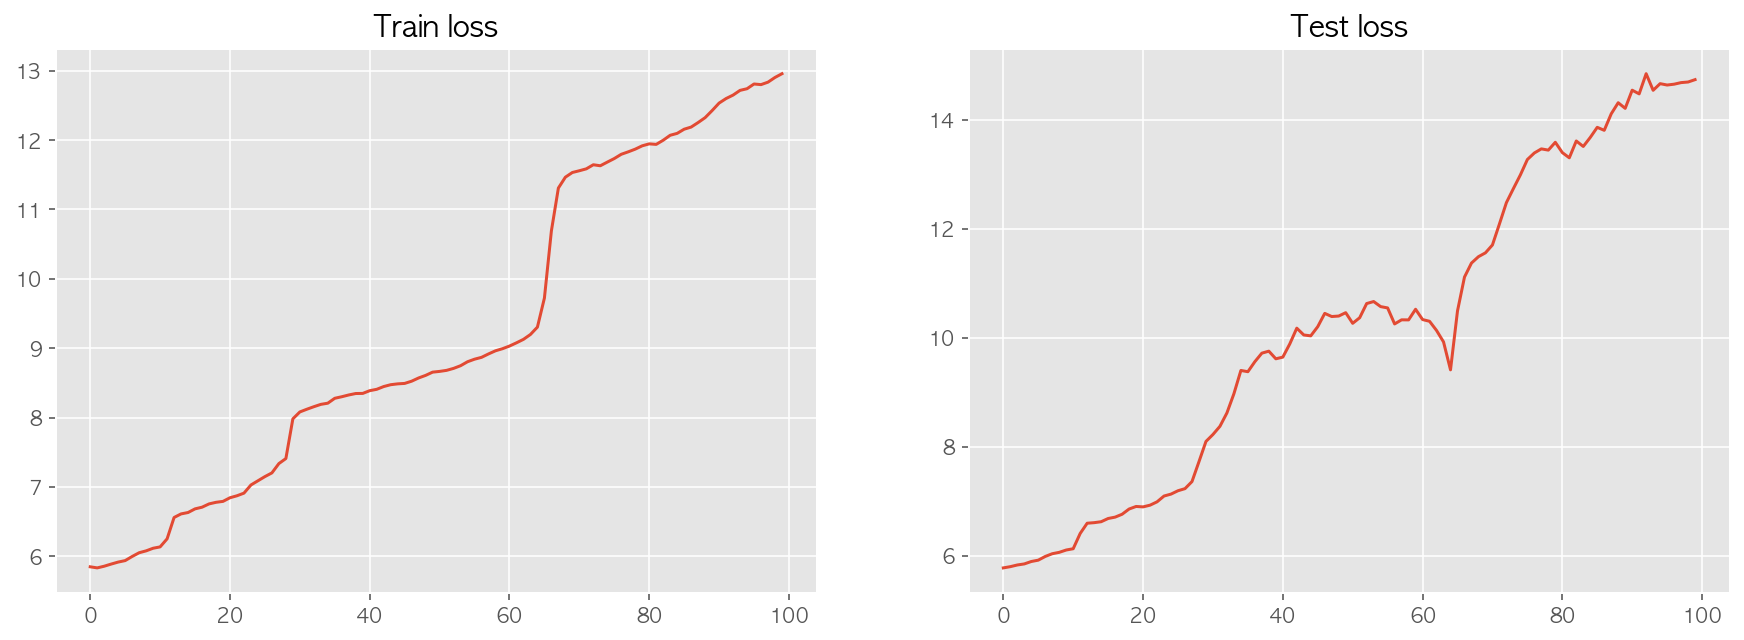

In [49]:
plot_history(history) # 3단계

In [50]:
predicted = model.predict(x_test)
y_pred = np.argmax(predicted, axis=1)
Y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

In [51]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = metrics.roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

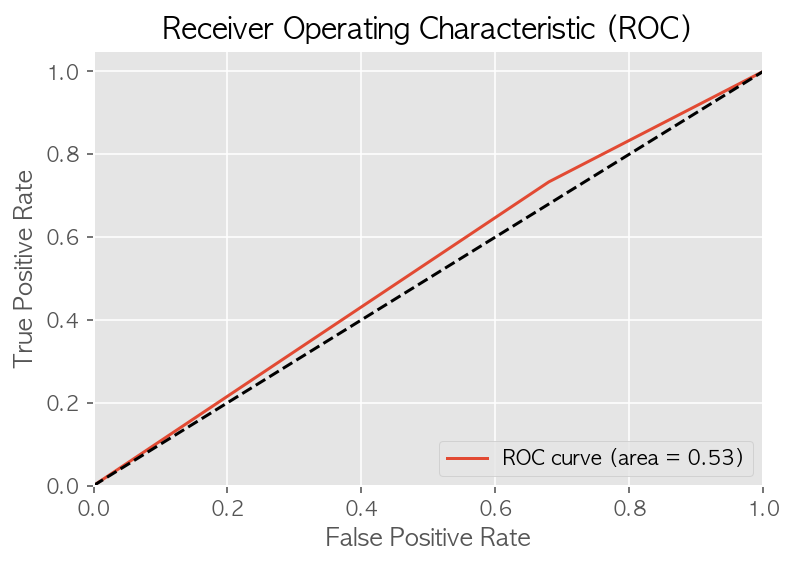

ROC AUC 값 : 0.5267


In [52]:
# 3단계
plot_roc(y_pred,Y_test)
from sklearn.metrics import roc_auc_score
roc_score = metrics.roc_auc_score(Y_test ,y_pred)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

In [53]:
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]
if tp == 0:
    tp = 1
if tn == 0:
    tn = 1
if fp == 0:
    fp = 1
if fn == 0:
    fn = 1
TPR = float(tp)/(float(tp)+float(fn))
FPR = float(fp)/(float(fp)+float(tn))
accuracy = round((float(tp) + float(tn))/(float(tp) +
                                          float(fp) + float(fn) + float(tn)), 3)
specitivity = round(float(tn)/(float(tn) + float(fp)), 3)
sensitivity = round(float(tp)/(float(tp) + float(fn)), 3)
mcc = round((float(tp)*float(tn) - float(fp)*float(fn))/math.sqrt(
    (float(tp)+float(fp))
    * (float(tp)+float(fn))
    * (float(tn)+float(fp))
    * (float(tn)+float(fn))
), 3)

f_output = open('binary_lstm_open_close_phase3_dropout_batch_Normal_3단계 test.txt', 'a')
f_output.write('=======\n')
f_output.write('{}epochs_{}batch\n'.format(
    25, 10))
f_output.write('TN: {}\n'.format(tn))
f_output.write('FN: {}\n'.format(fn))
f_output.write('TP: {}\n'.format(tp))
f_output.write('FP: {}\n'.format(fp))
f_output.write('TPR: {}\n'.format(TPR))
f_output.write('FPR: {}\n'.format(FPR))
f_output.write('accuracy: {}\n'.format(accuracy))
f_output.write('specitivity: {}\n'.format(specitivity))
f_output.write("sensitivity : {}\n".format(sensitivity))
f_output.write("mcc : {}\n".format(mcc))
f_output.write("{}".format(report))
f_output.write('=======\n')
f_output.close()

In [54]:
# 예측.
# y_hat = model.predict(x_test, batch_size = 1)
print(len(y_test))
print(len(y_pred))

165
165
